In [161]:
import pandas as pd
import numpy as np
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt

In [181]:
df = pd.read_excel('ZENITHB.xlsx',index_col="Date",parse_dates=True)

In [182]:
df.head()

,Close,Open,High,Low,Vol(millions)
Date,,,,,
2023-05-23,27.00,26.45,27.00,26.25,59.00
2023-05-22,26.45,26.00,26.45,25.05,53.43
2023-05-19,26.00,25.00,26.00,24.90,57.85
2023-05-18,25.00,25.15,25.00,24.90,29.06
2023-05-17,25.15,24.50,25.35,24.50,31.70


In [183]:
df.describe()

,Close,Open,High,Low,Vol(millions)
count,2804.000000,2804.000000,2804.000000,2804.000000,2804.000000
mean,20.379105,20.372397,20.601327,20.163520,26.693003
std,4.394871,4.444343,4.419674,4.371722,38.349827
min,9.000000,0.000000,9.440000,8.830000,1.000000
25%,16.800000,16.800000,16.987500,16.600000,9.727500
50%,21.000000,21.000000,21.290000,20.720000,17.250000
75%,24.000000,23.960000,24.050000,23.712500,30.790000
max,33.510000,34.200000,34.200000,32.550000,831.390000


In [184]:
df.shape

(2804, 5)

In [185]:
df.tail()

,Close,Open,High,Low,Vol(millions)
Date,,,,,
2012-01-27,12.10,12.01,12.22,12.01,117.01
2012-01-26,12.02,12.00,12.02,11.97,61.36
2012-01-25,12.00,12.00,12.10,11.95,46.58
2012-01-24,11.96,12.00,12.00,11.95,8.27
2012-01-23,12.00,12.05,12.05,11.95,16.15


In [186]:
df.isnull().sum()

Close            0
Open             0
High             0
Low              0
Vol(millions)    0
dtype: int64

In [187]:
df.isna().any()

Close            False
Open             False
High             False
Low              False
Vol(millions)    False
dtype: bool

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2804 entries, 2023-05-23 to 2012-01-23
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Close          2804 non-null   float64
 1   Open           2804 non-null   float64
 2   High           2804 non-null   float64
 3   Low            2804 non-null   float64
 4   Vol(millions)  2804 non-null   float64
dtypes: float64(5)
memory usage: 131.4 KB


In [189]:
print(len(df))

2804


<AxesSubplot:xlabel='Date'>

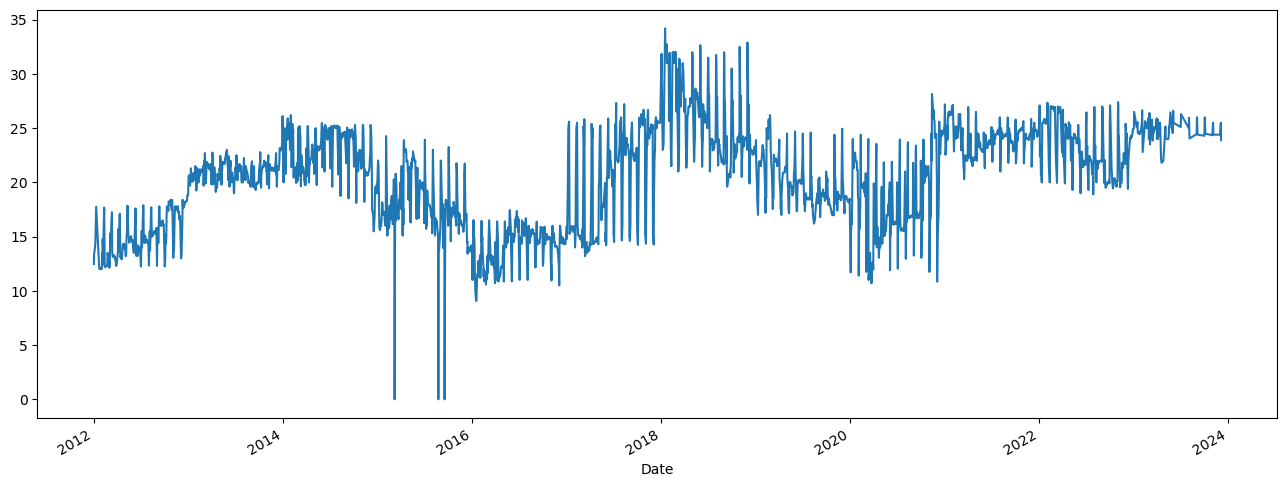

In [190]:
df['Open'].plot(figsize=(16,6))

In [191]:
X  = df[['Open','High','Low','Vol(millions)']]
y = df['Close']

In [192]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X ,y , random_state = 0)

In [193]:
X_train.shape

(2103, 4)

In [194]:
X_test.shape

(701, 4)

In [195]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
regressor = LinearRegression()

In [196]:
regressor.fit(X_train,y_train)

LinearRegression()

In [197]:
print(regressor.coef_)

[-6.31256103e-02  5.59855382e-01  5.03605542e-01  7.40820146e-05]


In [198]:
print(regressor.intercept_)

-0.026562062531986896


In [199]:
predicted = regressor.predict(X_test)

In [200]:
print(X_test)

             Open   High    Low  Vol(millions)
Date                                          
2019-09-12  18.60  18.60  18.50          24.23
2020-11-26  24.50  25.00  24.50          40.57
2023-07-02  25.10  25.10  25.00          14.67
2021-12-17  24.80  25.20  24.80          21.94
2022-11-28  21.90  22.00  21.70           7.12
...           ...    ...    ...            ...
2018-10-19  22.55  22.90  22.55           8.55
2023-02-22  25.00  25.20  25.00          13.00
2015-04-27  22.00  22.00  21.94          11.60
2019-10-04  20.15  21.05  20.20          11.67
2021-09-20  23.80  23.70  23.50           5.66

[701 rows x 4 columns]


In [201]:
predicted.shape

(701,)

In [202]:
dframe=pd.DataFrame(y_test,predicted)

In [203]:
dfr=pd.DataFrame({'Actual':y_test,'Predicted':predicted})

In [204]:
print(dfr)

            Actual  Predicted
Date                         
2019-09-12    18.5  18.531109
2020-11-26    24.5  24.764586
2023-07-02    25.0  25.032581
2021-12-17    24.8  25.007321
2022-11-28    22.0  21.836573
...            ...        ...
2018-10-19    22.9  22.727582
2023-02-22    25.2  25.094755
2015-04-27    22.0  21.951458
2019-10-04    20.6  20.660109
2021-09-20    23.5  23.574771

[701 rows x 2 columns]


In [205]:
dfr.head(25)

,Actual,Predicted
Date,,
2019-09-12,18.50,18.531109
2020-11-26,24.50,24.764586
2023-07-02,25.00,25.032581
2021-12-17,24.80,25.007321
2022-11-28,22.00,21.836573
2022-11-18,21.35,21.157854
2016-04-11,14.80,14.859396
2022-08-03,26.80,26.785950
2015-06-05,21.36,21.452421


In [206]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [207]:
regressor.score(X_test,y_test)


0.9976363963119467

In [208]:
import math

In [209]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,predicted))

Mean Absolute Error: 0.14430338712120122


In [210]:
print('Mean Squared  Error:',metrics.mean_squared_error(y_test,predicted))

Mean Squared  Error: 0.04393128948884396


In [211]:
print('Root Mean Squared Error:',math.sqrt(metrics.mean_squared_error(y_test,predicted)))

Root Mean Squared Error: 0.2095979233886728


In [212]:
graph=dfr.head(20)

<AxesSubplot:xlabel='Date'>

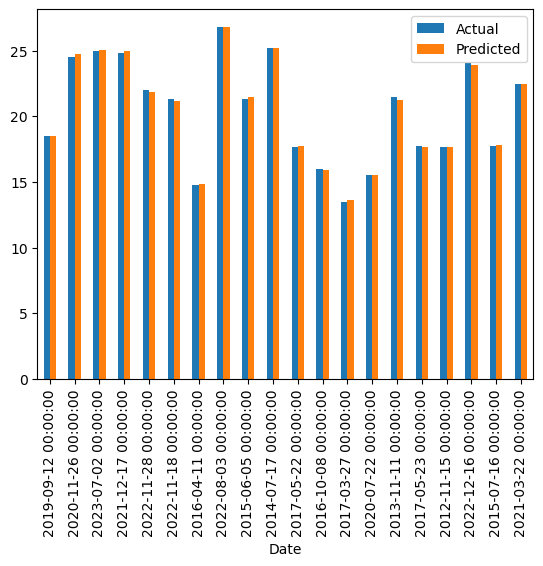

In [215]:
graph.plot(kind='bar')